# In this project,I will working with a information about public transport journey volume by transport type.

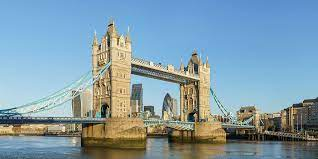

 ## Single table called

JOURNEYS

|Column|	Definition|	Data type|
|:----:|:----:|:----:|
|MONTH|	Month in number format, e.g., 1 equals January	|INTEGER|
|YEAR|	Year	|INTEGER|
|DAYS|	Number of days in the given month|	INTEGER|
|REPORT_DATE	|Date that the data was reported	|DATE|
|JOURNEY_TYPE|	Method of transport used|	VARCHAR|
|JOURNEYS_MILLIONS|	Millions of journeys, measured in decimals	|FLOAT|

In [2]:
import pandas as pd
import sqlite3 as sql
df=pd.read_csv("tfl_journeys_final.csv")
conn = sql.connect('default.db')
df.to_sql('tfl_table',conn)


936

In [ ]:
# Incase you are trying to Re-create the table, it would fail.
# In such scenarios, call the cleanup function to drop the existing table before re-creation.

# def cleanup(table):
#     cursor = conn.cursor()
#     cursor.execute('DROP TABLE IF EXISTS '+ table )
#     return




### What are the most popular transport types, measured by the total number of journeys? 

In [10]:
query = "SELECT JOURNEY_TYPE,SUM(JOURNEYS_MILLIONS) AS total_journeys_millions \
FROM tfl_table \
GROUP BY 1 \
ORDER BY 2 DESC;"

new_df = pd.read_sql(query, conn)
new_df.head()

,journey_type,total_journeys_millions
0,Bus,24905.193947
1,Underground & DLR,15020.466544
2,Overground,1666.845666
3,TfL Rail,411.313421
4,Tram,314.689875


###  Which five months and years were  the most popular  for Emirates Airline cable car travel

In [15]:
query = "SELECT month,year,ROUND(journeys_millions,2) AS rounded_journeys_millions \
FROM tfl_table \
WHERE journey_type = 'Emirates Airline' and journeys_millions IS NOT NULL \
ORDER BY rounded_journeys_millions DESC, year ASC \
LIMIT 5;"

new_df = pd.read_sql(query, conn)
new_df.head(5)

,month,year,rounded_journeys_millions
0,5,2012,0.53
1,6,2012,0.38
2,4,2012,0.24
3,5,2013,0.19
4,5,2015,0.19


### Find the five years with the lowest volume of popular years for the tube

In [16]:
query = "SELECT year,journey_type,SUM(journeys_millions) AS total_journeys_millions \
FROM tfl_table \
WHERE journey_type LIKE '%Underground%' \
GROUP BY 1,2 \
ORDER BY 3 ASC \
LIMIT 5;"

new_df = pd.read_sql(query, conn)
new_df.head(5)

,year,journey_type,total_journeys_millions
0,2020,Underground & DLR,310.179316
1,2021,Underground & DLR,748.452544
2,2022,Underground & DLR,1064.859009
3,2010,Underground & DLR,1096.145588
4,2011,Underground & DLR,1156.647654
